## Labarotorio 4 Inteligencia Artificial 

### Task 1.1. Leer el archivo CSV proporcionado (kc_house_data.csv dentro de lab4_dataset.zip) y almacenarlo en un p.array para ser trabajado en el notebook.

Para iniciar con este proceso, primero se deben importar las librerías correspondientes.

In [20]:
#Importar librerias
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random

Posteriormente, ya se pueden importar los datos y almacenarlos en una matriz de NumPy.

In [21]:
data = pd.read_csv('kc_house_data.csv')
data_numpy = np.array(data)

print(data_numpy)

[[7129300520 '20141013T000000' 221900.0 ... -122.257 1340 5650]
 [6414100192 '20141209T000000' 538000.0 ... -122.319 1690 7639]
 [5631500400 '20150225T000000' 180000.0 ... -122.233 2720 8062]
 ...
 [1523300141 '20140623T000000' 402101.0 ... -122.299 1020 2007]
 [291310100 '20150116T000000' 400000.0 ... -122.069 1410 1287]
 [1523300157 '20141015T000000' 325000.0 ... -122.299 1020 1357]]


### Task 1.2. Ajustar un modelo polinomial (regresión lineal) en base al juego de datos cargado de forma matricial que relaciona las variables de precio con los pies cuadrados del espacio habitable interior de los apartamentos (price - sqft living).

Para poder analizar las variables de precio y pies cuadrados de espacio, se debe primero separar las variables correspondientes del set de datos dado.

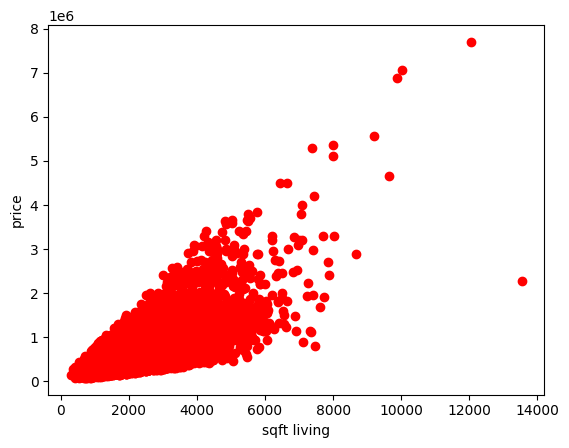

In [22]:
Y = data["price"]  # price
X = data["sqft_living"]  # sqft living

# Almacenar datos en numpy array
x = np.array(X)
y = np.array(Y)

# Graficar datos con nombre de ejes
plt.xlabel("sqft living")
plt.ylabel("price")
plt.scatter(x, y, color="red")

Ahora se crearan las respectivas matrices y vectores para posteriormente poder hacer el cálculo y crear el modelo de regresión lineal. Estas matrices relacionan las variables de precio con los pies cuadrados de living space.

In [23]:
# matriz w = almacena w0, w1, ..., wn
# matriz x = almacena 1, xn^1, xn^2, ..., xn^n
# matriz X = almacena 1, x1, x1^2, ..., x1^n; 1, x2, x2^2, ..., x2^n; ...; 1, xm, xm^2, ..., xm^n

grado = 1
N = len(x)

# Matriz de caracteristicas = X
X_matrix = np.array([[x[i] ** j for j in range(0, grado+1)] for i in range(N)])
print("\nMatriz de Caracteristicas (X):",X_matrix)

# Matriz de valores reales (t) = wT * X
Y_matrix = np.array([[y[i]] for i in range(N)])


Matriz de Caracteristicas (X): [[   1 1180]
 [   1 2570]
 [   1  770]
 ...
 [   1 1020]
 [   1 1600]
 [   1 1020]]


#### Ajuste de modelo polinomial dada la forma matricial
En base a las matrices anteriormente creadas, se puede calcular el valor "teórico" de los pesos w0 y w1 a través de la siguiente función. 
[B0, B1] = (X^T.X)^-1 * (X^T.Y)


Matriz de Pesos (w): [[-43580.74309447]
 [   280.6235679 ]]


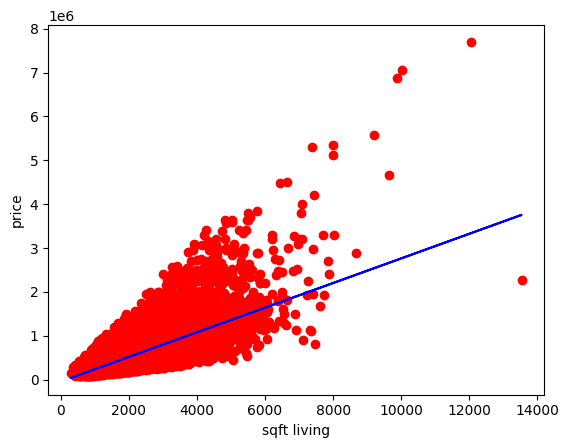

In [24]:
# En este caso, se calculó el valor teórico de w0 y w1 dado las matrices X y Y.
# Matriz w
w = np.linalg.inv(X_matrix.T.dot(X_matrix)).dot((X_matrix.T).dot(Y_matrix))
print("\nMatriz de Pesos (w):",w)

# Graficar w0 y w1 con los datos
plt.scatter(x, y, color="red")
plt.xlabel("sqft living")
plt.ylabel("price")
plt.plot(x, X_matrix.dot(w), color="blue")
plt.show()

### Task 1.3. Utilice la implementación vectorial del algoritmo de regresión lineal (descenso del gradiente visto en clase).
Ya que anteriormente se creó el modelo polinomial de forma matricial (se crearon las respectivas matrices), ahora se puede implementar el descenso del grandiente para terminar el respectovo modelo.

Como primer paso, se creó un ciclo for que iba analizando el peso del vector. Posteriormente, iba calculando el error de valores predichos dado el peso del vector modificado. Con eso, calculaba la función perdida; que indicaba el gradiente. Finalmente, se iba actualizando los pesos.

In [25]:
w0 = random.random()
w1 = random.random()
w = np.array([[w0], [w1]])

# Tasa de aprendizaje y número de iteraciones
learning_rate = 0.000000001
num_iter = 10000

for i in range(num_iter):

    # Calcular el error (Valor real vs. Valor predicho)
    y_pred = X_matrix.dot(w)
    error = y_pred - Y_matrix

    # Calcular el gradiente
    funcion_perdida = (1/N) * X_matrix.T.dot(error)
    
    # Actualizar los pesos
    w = w - (learning_rate * funcion_perdida)

# Imprimir los pesos y la última pérdida
print("Pesos obtenidos:", w)

Pesos obtenidos: [[  0.58698741]
 [263.08895271]]


Como se puede observar, los pesos obtenidos son muy similares a lo que anteriormente se calculó. Así confirmando el proceso del descenso de gradiente implementado.

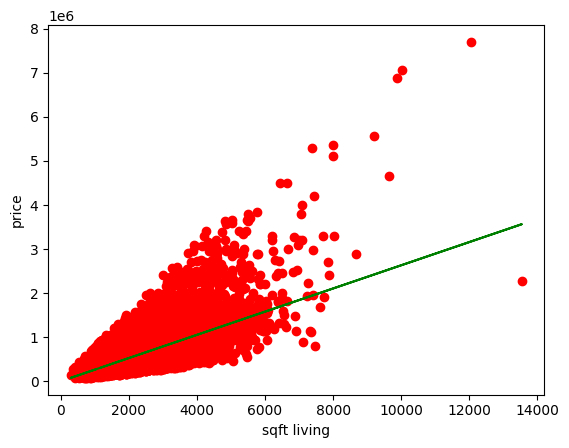

In [26]:
# Graficar w0 y w1 con los datos experimentales
plt.scatter(x, y, color="red")
plt.xlabel("sqft living")
plt.ylabel("price")
plt.plot(x, X_matrix.dot(w), color="green")
plt.show()

### Task 1.4 Usando cross-validation determine el grado del polinomio que mejor describe la nube de puntos (encuentre el mejor balance entre apego a los datos de entrenamiento y generalización para datos previamente no observados).

Definir los grados a probar, semilla aletoria y número de folds

In [27]:
import numpy as np

grados = [1, 2, 3, 4, 5]
np.random.seed(1)
folds = 5

Bucle para probar diferentes grados

In [28]:


for grado in grados:

    # Calcular características polinomiales para el grado actual
    X = np.array([[x[i]**j for j in range(grado+1)] for i in range(N)])
    
    # Inicializar una lista para almacenar los errores cuadráticos medios
    scores = []

    for i in range(folds):

        # Dividir los datos en entrenamiento y prueba
        X_train = np.concatenate((X[:i*N//folds], X[(i+1)*N//folds:]))
        X_test = X[i*N//folds:(i+1)*N//folds]
        Y_train = np.concatenate((Y[:i*N//folds], Y[(i+1)*N//folds:]))
        Y_test = Y[i*N//folds:(i+1)*N//folds]       

        # Inicializar los pesos aleatorios y configurar el algoritmo de descenso de gradiente
        w = np.random.rand(grado+1, 1)
        alpha = 0.000000001
        num_iterations = 10000

        # Ajustar el modelo utilizando el algoritmo de descenso de gradiente
        for i in range(num_iterations):
            # Calcular la salida del modelo y el error para los datos de entrenamiento
            y_train_pred = np.dot(X_train, w)
            train_error = y_train_pred - Y_train

            # Actualizar los pesos utilizando el algoritmo de descenso de gradiente
            gradient = (2/X_train.shape[0]) * np.dot(X_train.T, train_error)
            w = w - alpha * gradient

        # Calcular la salida del modelo y el error para los datos de prueba
        y_test_pred = np.dot(X_test, w)
        test_error = y_test_pred - Y_test

        # Calcular el error cuadrático medio para los datos de prueba
        mse = (1/X_test.shape[0]) * np.dot(test_error.T, test_error)
        scores.append(mse)


[[-8.16995971e+05 -9.06995971e+05 -9.15995971e+05 ... -8.01197971e+05
  -7.96995971e+05 -6.46995971e+05]
 [-1.70191002e+09 -1.88952516e+09 -1.90828668e+09 ... -1.66897731e+09
  -1.66021777e+09 -1.34752586e+09]]
[[0.417022  ]
 [0.72032449]]
1e-09
[[-8.09900323e+05 -8.99118113e+05 -9.08039892e+05 ... -7.94239627e+05
  -7.90074147e+05 -6.41377830e+05]
 [-1.68425913e+09 -1.86992848e+09 -1.88849541e+09 ... -1.65166798e+09
  -1.64299928e+09 -1.33355037e+09]]
[[0.417839   0.417929   0.417938   ... 0.4178232  0.417819   0.417669  ]
 [2.42223452 2.60984966 2.62861117 ... 2.3893018  2.38054226 2.06785036]]
1e-09
[[-8.02878265e+05 -8.91321958e+05 -9.00166327e+05 ... -7.87353449e+05
  -7.83224111e+05 -6.35817957e+05]
 [-1.66679131e+09 -1.85053503e+09 -1.86890941e+09 ... -1.63453816e+09
  -1.62595937e+09 -1.31971983e+09]]
[[0.4186489  0.41882812 0.41884604 ... 0.41861744 0.41860907 0.41831038]
 [4.10649365 4.47977814 4.51710658 ... 4.04096978 4.02354154 3.40140073]]
1e-09
[[-7.95929035e+05 -8.83606

KeyboardInterrupt: 

Encontrar el grado que minimiza el error

In [ ]:
min_score = min(scores)
min_score_index = scores.index(min_score)
min_score_grado = grados[min_score_index]

print("El grado que minimiza el error es:", min_score_grado)


### Task 1.5. Haga un análisis sobre sus hallazgos.
Al analizar los datos del sobre la relación del tamaño y precio de una vivienda, se puede observar que estas dos variables tienen una relación lineal. 